In [1]:
import os
import sys
import subprocess
root = "/data/luojaa/eukgen/"
%cd {root}
sys.path.append(root)
import pandas as pd
import altair as alt
#import altair_saver

import ete3
from ete3 import Tree, TreeStyle, TextFace

from core_functions.microcosm_functions import color_tree, tree_analysis
from core_functions.altair_plots import plot_alignment, plot_cumsum_counts
from core_functions.tree_functions import get_outlier_nodes_by_lognorm

#disable altair max rows
alt.data_transformers.disable_max_rows()
#get default altair style'
%run /data/luojaa/eukgen/styling_and_visualisation.py

#dont wrap text output from cells
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

/vf/users/luojaa/eukgen


/tmp/ipykernel_83482/542040546.py:24: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [8]:
os.environ['QT_QPA_PLATFORM']='offscreen'

In [9]:
# treefiles = subprocess.run(f"find processing/microcosm_enriched/ -maxdepth 2 -name '*.tree_data.tsv'",shell=True, text=True, capture_output=True)
# treefiles = [f for f in treefiles.stdout.split('\n')][:-1]

In [10]:
# print(len(treefiles))
# new_data = []

# for file in treefiles:
#     data = pd.read_csv(file, sep='\t', index_col=0)
#     new_data.append(data)

# all_data = pd.concat(new_data, axis=0)
# all_data.to_csv('tmp/microcosm_tree_data.enriched.tsv', sep='\t')

### how many search results found ribosome kog profiles 

In [11]:
# eukseq_hits = pd.read_csv('/data/luojaa/kegg_db/search_eukseq_vsboth/eukseq_both_hits.tsv', sep = '\t')

# prokseq_hits = pd.read_csv('/data/luojaa/kegg_db/search_prokseq_vsboth/prokseq_both_hits.tsv', sep = '\t')

In [12]:
search_hits_summary = pd.read_csv('/data/luojaa/kegg_db/promisc_stats.search_both.tsv', sep = '\t')
search_hits_ribosome = search_hits_summary[search_hits_summary["KOG"].isin(ribosome)]
search_hits_ribosome

KOG     pvp  pvboth    pve  pvp_norm  pvboth_norm  pve_norm    evp  \
881  K02866   149.0    32.0    5.0  0.801075     0.172043  0.026882   31.0   
884  K02873    13.0     0.0    0.0  1.000000     0.000000  0.000000    0.0   
886  K02875   318.0     0.0    0.0  1.000000     0.000000  0.000000   13.0   
888  K02877     3.0   167.0    0.0  0.017647     0.982353  0.000000   10.0   
892  K02883   218.0     0.0    0.0  1.000000     0.000000  0.000000   28.0   
894  K02885   204.0     0.0    0.0  1.000000     0.000000  0.000000   65.0   
898  K02889   210.0     0.0    0.0  1.000000     0.000000  0.000000   29.0   
902  K02896   160.0     0.0    0.0  1.000000     0.000000  0.000000    8.0   
905  K02900     3.0     0.0  222.0  0.013333     0.000000  0.986667    0.0   
910  K02908   244.0   398.0   30.0  0.363095     0.592262  0.044643   62.0   
912  K02910   159.0     0.0    2.0  0.987578     0.000000  0.012422    4.0   
914  K02912     3.0   101.0   16.0  0.025000     0.841667  0.133333    1.0   
917  K02915   122.0     0.0    0.0  1.000000     0.000000  0.000000   10.0   
919  K02917    44.0    36.0    2.0  0.536585     0.439024  0.024390   10.0   
921  K02921     5.0   180.0    1.0  0.026882     0.967742  0.005376    1.0   
922  K02922   130.0     0.0    0.0  1.000000     0.000000  0.000000    7.0   
923  K02923     8.0    64.0    0.0  0.111111     0.888889  0.000000    1.0   
924  K02924     0.0   148.0    0.0  0.000000     1.000000  0.000000    0.0   
926  K02927   120.0     0.0    0.0  1.000000     0.000000  0.000000    4.0   
927  K02928     2.0     0.0    0.0  1.000000     0.000000  0.000000    1.0   
928  K02929     4.0   154.0    0.0  0.025316     0.974684  0.000000    6.0   
929  K02930  1941.0     0.0    0.0  1.000000     0.000000  0.000000  284.0   
933  K02936   260.0     0.0    0.0  1.000000     0.000000  0.000000  716.0   
935  K02943     1.0     0.0    2.0  0.333333     0.000000  0.666667    0.0   

     evboth     eve  evp_norm  evboth_norm  eve_norm  
881    56.0   544.0  0.049128     0.088748  0.862124  
884     0.0   751.0  0.000000     0.000000  1.000000  
886     0.0   706.0  0.018081     0.000000  0.981919  
888   554.0    23.0  0.017036     0.943782  0.039182  
892     0.0   713.0  0.037787     0.000000  0.962213  
894    47.0   467.0  0.112263     0.081174  0.806563  
898     0.0   698.0  0.039890     0.000000  0.960110  
902     0.0   381.0  0.020566     0.000000  0.979434  
905     0.0   647.0  0.000000     0.000000  1.000000  
910   490.0    87.0  0.097027     0.766823  0.136150  
912     0.0   615.0  0.006462     0.000000  0.993538  
914   581.0    64.0  0.001548     0.899381  0.099071  
917    21.0   542.0  0.017452     0.036649  0.945899  
919    39.0   550.0  0.016694     0.065109  0.918197  
921   357.0    35.0  0.002545     0.908397  0.089059  
922     0.0   321.0  0.021341     0.000000  0.978659  
923   136.0   152.0  0.003460     0.470588  0.525952  
924   147.0     1.0  0.000000     0.993243  0.006757  
926     0.0   230.0  0.017094     0.000000  0.982906  
927     1.0     6.0  0.125000     0.125000  0.750000  
928   308.0    93.0  0.014742     0.756757  0.228501  
929     3.0   687.0  0.291581     0.003080  0.705339  
933     0.0   685.0  0.511064     0.000000  0.488936  
935     0.0  1824.0  0.000000     0.000000  1.000000

In [13]:
search_hits_ribosome["prokhits"] = search_hits_ribosome["pvp"] + search_hits_ribosome["pve"] + 2*search_hits_ribosome["pvboth"]
search_hits_ribosome["eukhits"] = search_hits_ribosome["evp"] + search_hits_ribosome["eve"] + 2*search_hits_ribosome["evboth"]

/tmp/ipykernel_3170931/152255974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_hits_ribosome["prokhits"] = search_hits_ribosome["pvp"] + search_hits_ribosome["pve"] + 2*search_hits_ribosome["pvboth"]
/tmp/ipykernel_3170931/152255974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_hits_ribosome["eukhits"] = search_hits_ribosome["evp"] + search_hits_ribosome["eve"] + 2*search_hits_ribosome["evboth"]


In [14]:
sum(search_hits_ribosome["prokhits"]), sum(search_hits_ribosome["eukhits"])

(7161.0, 17593.0)

### merge pathways with tree_data

In [15]:
tree_data = pd.read_csv('tmp/microcosm_tree_data.enriched.tsv', sep='\t', index_col=0)
tree_data.set_index('tree_name', inplace=True)

category_data = pd.read_csv('/data/luojaa/kegg/kegg_categories.tsv', sep = '\t')

In [16]:
category_data

KOGID CATEGORY_ID                                 CATEGORY_NAME
0      K20411    map04150                        mTOR signaling pathway
1      K00919    map00900               Terpenoid backbone biosynthesis
2      K00919    map01100                            Metabolic pathways
3      K00919    map01110         Biosynthesis of secondary metabolites
4      K19290    map00051               Fructose and mannose metabolism
...       ...         ...                                           ...
59355  K26491      M00971  QS-7 biosynthesis, 2,3-epoxysqualene => QS-7
59356  K26493      M00971  QS-7 biosynthesis, 2,3-epoxysqualene => QS-7
59357  K26494      M00971  QS-7 biosynthesis, 2,3-epoxysqualene => QS-7
59358  K26495      M00971  QS-7 biosynthesis, 2,3-epoxysqualene => QS-7
59359  K27109      M00155             Cytochrome c oxidase, prokaryotes

[59360 rows x 3 columns]

In [181]:
module_data = category_data[category_data["CATEGORY_ID"].str.startswith("M")]

In [17]:
pathway_data = category_data[category_data["CATEGORY_ID"].str.contains("map")]
pathway_data_drep = pathway_data[pathway_data["CATEGORY_NAME"] != "Metabolic pathways"]

In [18]:
pathway_data_drep["CATEGORY_NAME"].value_counts()[:10]

CATEGORY_NAME
Biosynthesis of secondary metabolites                2115
Microbial metabolism in diverse environments         1281
ABC transporters                                      515
Two-component system                                  514
Pathways in cancer                                    417
Biosynthesis of cofactors                             375
Pathways of neurodegeneration - multiple diseases     368
Carbon metabolism                                     366
Neuroactive ligand-receptor interaction               332
Alzheimer disease                                     300
Name: count, dtype: int64

In [19]:
pathway_data_drep[pathway_data_drep["CATEGORY_NAME"] == "Carbon metabolism"]

KOGID CATEGORY_ID      CATEGORY_NAME
61     K00925    map01200  Carbon metabolism
135    K16160    map01200  Carbon metabolism
242    K00058    map01200  Carbon metabolism
344    K25031    map01200  Carbon metabolism
448    K10713    map01200  Carbon metabolism
...       ...         ...                ...
44869  K00874    map01200  Carbon metabolism
45105  K05298    map01200  Carbon metabolism
45445  K01834    map01200  Carbon metabolism
45551  K01808    map01200  Carbon metabolism
45735  K16179    map01200  Carbon metabolism

[366 rows x 3 columns]

In [20]:
kog2map = pathway_data_drep[["KOGID", "CATEGORY_ID"]].set_index("KOGID")
tree_data_maps = pd.merge(kog2map, tree_data, how = "outer", right_index= True, left_index=True).dropna()

### look at individual trees for pathways

In [81]:
#"K12844" in set(tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].index)
kog_functions = pd.read_csv("/data/luojaa/uid_stats/kog_functions.tsv", sep = "\t")

In [508]:
pathway = "map00071"
systems = iter(set(tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].index))


In [501]:
module = "M00137"
systems = iter(set(tree_data_modules[tree_data_modules["CATEGORY_ID"] == module].index))


K00249
acyl-CoA dehydrogenase [EC:1.3.8.7]
System K00249 has Eukaryotic clades ['EP00806P000225' 'EP00081P012975']
rendered
Tree has 100 leaves


alt.Chart(...)

euk_clade_rep  prok_clade_rep  prok_clade_size  \
tree_name                                                    
K00249     EP00806P000225  WP_141625586_1              206   
K00249     EP00081P012975  WP_187733614_1              219   
K00249     EP00081P012975  WP_005578657_1              218   
K00249     EP00081P012975  WP_003931956_1              285   
K00249     EP00081P012975  WP_041661783_1              374   
K00249     EP00081P012975  WP_144353175_1              147   
K00249     EP00806P000225  WP_190263882_1               93   
K00249     EP00806P000225  WP_011690305_1               92   
K00249     EP00806P000225  WP_015693300_1               92   
K00249     EP00806P000225  WP_013133590_1              310   
K00249     EP00081P012975  WP_015047357_1               88   
K00249     EP00081P012975  WP_011749869_1              192   
K00249     EP00806P000225  WP_003931956_1              285   
K00249     EP00806P000225  WP_187733614_1              219   

                     prok_taxa  top_dist  raw_stem_length  \
tree_name                                                   
K00249     Alphaproteobacteria       1.0         0.034708   
K00249               FCB group       1.0         0.423240   
K00249           Euryarchaeota       6.0         0.581497   
K00249          Actinomycetota       4.0         0.471988   
K00249          Actinomycetota       6.0         0.653844   
K00249               Bacillota       3.0         0.488857   
K00249          Actinomycetota       4.0         0.493664   
K00249          Actinomycetota       5.0         0.493664   
K00249               FCB group       3.0         0.271721   
K00249          Actinomycetota       3.0         0.271721   
K00249     Gammaproteobacteria       6.0         0.471988   
K00249     Alphaproteobacteria       5.0         0.471988   
K00249          Actinomycetota       4.0         0.821167   
K00249               FCB group       7.0         0.985608   

           median_euk_leaf_dist  bp-RELL bp-RELL_accept    p-KH p-KH_accept  \
tree_name                                                                     
K00249                 0.357240   1.0000              +  0.9980           +   
K00249                 0.342244   0.3640              +  0.5120           +   
K00249                 0.342244   0.3130              +  0.4880           +   
K00249                 0.342244   0.1920              +  0.2490           +   
K00249                 0.342244   0.1160              +  0.1810           +   
K00249                 0.342244   0.0160              -  0.0970           +   
K00249                 0.357240   0.0005              -  0.0020           -   
K00249                 0.357240   0.0000              -  0.0001           -   
K00249                 0.357240   0.0000              -  0.0000           -   
K00249                 0.357240   0.0000              -  0.0000           -   
K00249                 0.342244   0.0000              -  0.0000           -   
K00249                 0.342244   0.0000              -  0.0000           -   
K00249                 0.357240   0.0000              -  0.0000           -   
K00249                 0.357240   0.0000              -  0.0000           -   

             p-SH p-SH_accept         c-ELW c-ELW_accept          p-AU  \
tree_name                                                                
K00249     1.0000           +  9.990000e-01            +  9.990000e-01   
K00249     1.0000           +  3.590000e-01            +  6.670000e-01   
K00249     0.9070           +  3.200000e-01            +  6.400000e-01   
K00249     0.6050           +  1.900000e-01            +  2.920000e-01   
K00249     0.5200           +  1.140000e-01            +  2.420000e-01   
K00249     0.4340           +  1.710000e-02            -  7.950000e-02   
K00249     0.0957           +  5.710000e-04            -  1.080000e-03   
K00249     0.0189           -  4.170000e-08            -  2.980000e-07   
K00249     0.0097           -  4.5000

alt.VConcatChart(...)

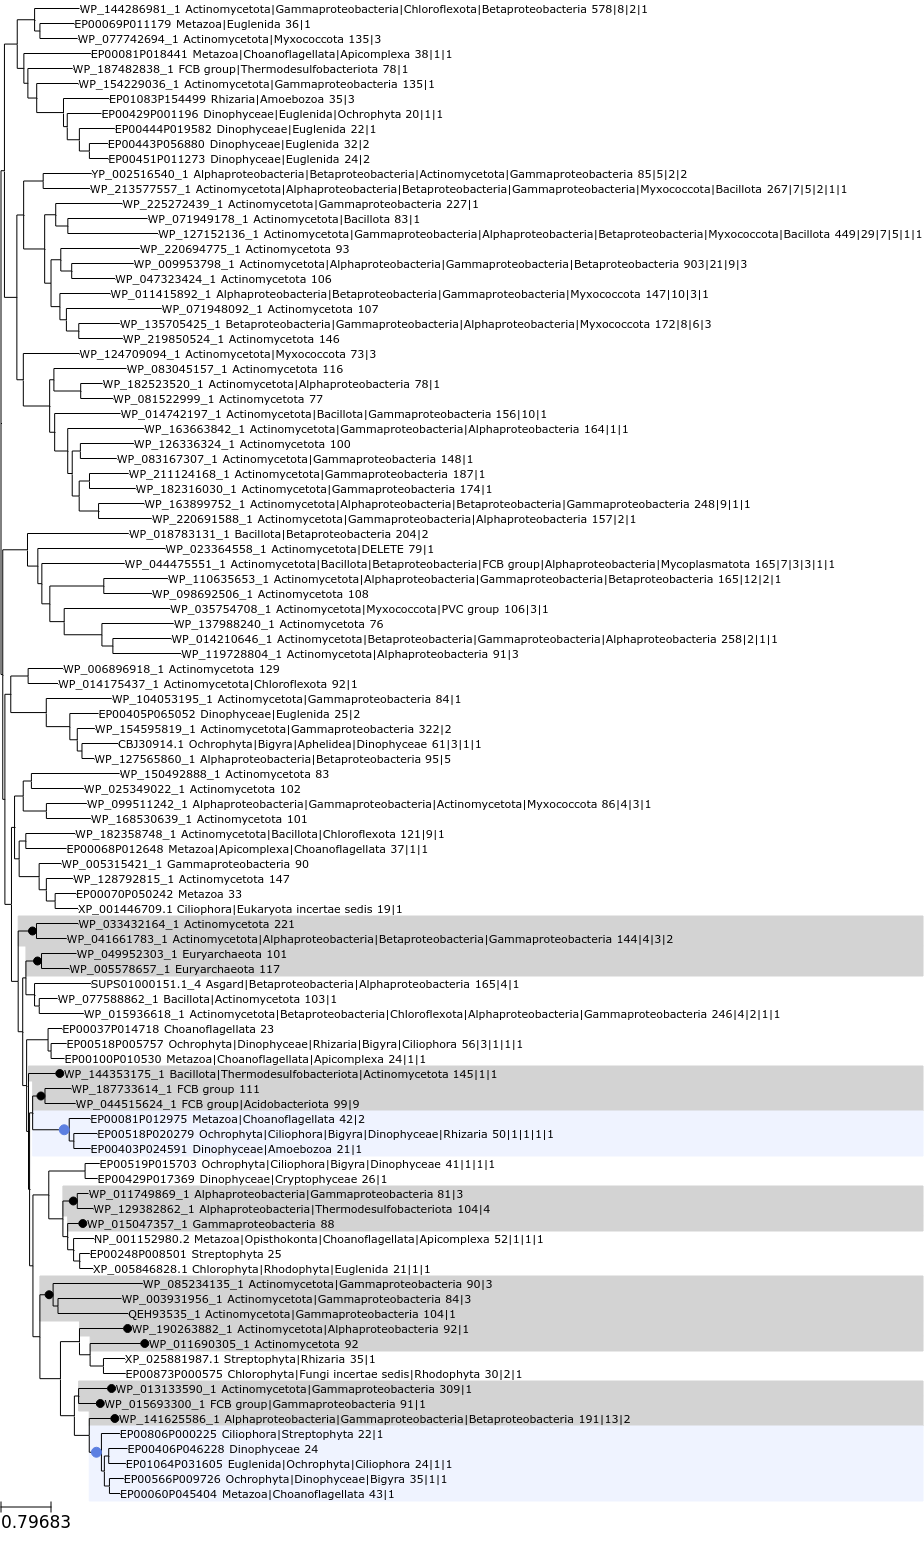

In [523]:
#microcosm_path = '/data/luojaa/eukgen/processing/microcosm/'
microcosm_path = '/data/luojaa/eukgen/processing/microcosm_enriched/'
system = next(systems)
function = kog_functions[kog_functions["KOGID"] == system].FUNCTION.values[0]
#system = 'K00659'
print(system)
print(function)
data = tree_data.loc[[system]].sort_values(by='c-ELW', ascending=False)
    
clades = data.euk_clade_rep.unique()
print(f'System {system} has Eukaryotic clades {clades}')

clade = clades[0]

plot_data = data[data.euk_clade_rep == clade]

dist_bar = alt.Chart(data, title=f'{system}: {clade}').mark_bar().encode(
    x = alt.X('prok_taxa', sort=None, axis=alt.Axis(labelAngle=-45)),
    y = alt.Y('top_dist'),
    color = alt.Color('prok_taxa:O'),
    tooltip = alt.Tooltip(['top_dist', 'prok_clade_weight', 'prok_clade_size', 'prok_clade_rep', 'prok_leaf_clade'])
)

tree = Tree(f'{microcosm_path}{system}/{system}.merged.fasta.muscle.treefile.annot')
annot_tree, tree_img = color_tree(tree, view_in_notebook=True)


from core_functions.altair_plots import plot_alignment
aln_file = f'{microcosm_path}{system}/{system}.merged.fasta.muscle'

#leaf_names = [leaf.name for leaf in trees[system].get_leaves()]
leaf_names = [leaf.name for leaf in tree.get_leaves()]

plot, aln_data = plot_alignment(aln_file, seqlimit=100, plot_range=(0,300), label_order=leaf_names)

print(f'Tree has {len(leaf_names)} leaves')
display(dist_bar)
display(data.iloc[:,[0,4,5,8,10,11,12,16,17,18,19,20,21,22,23,24,25]])
#display(pd.DataFrame(CDD_annot.loc[system]))
display(plot)
display(tree_img)

In [515]:
print(len(set(tree_data_modules[tree_data_modules["CATEGORY_ID"] == module].index)))
tree_data_modules[tree_data_modules["CATEGORY_ID"] == module].sort_values("c-ELW", ascending = False).drop_duplicates("euk_clade_rep")["prok_taxa"].value_counts()

4


prok_taxa
Actinomycetota         4
Cyanobacteriota        1
FCB group              1
Gammaproteobacteria    1
DELETE                 1
Alphaproteobacteria    1
Name: count, dtype: int64

### filter pathways and look at top sister clades

In [511]:
# number of microcosms with this pathway
len(set(tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].index))


53

In [512]:
# if pathway = map04150, which is mTOR, top sister clade
tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].sort_values("c-ELW", ascending = False).drop_duplicates("euk_clade_rep")["prok_taxa"].value_counts()

prok_taxa
Actinomycetota             54
Gammaproteobacteria        20
Alphaproteobacteria        10
FCB group                   8
Bacillota                   8
Betaproteobacteria          7
Myxococcota                 4
Euryarchaeota               2
Cyanobacteriota             2
Asgard                      2
TACK group                  1
Thermodesulfobacteriota     1
PVC group                   1
Name: count, dtype: int64

In [513]:
# all sister clades
tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway]["prok_taxa"].value_counts()

prok_taxa
Actinomycetota             310
Gammaproteobacteria        137
Alphaproteobacteria        115
Bacillota                  100
Betaproteobacteria          77
FCB group                   64
PVC group                   32
Thermodesulfobacteriota     26
Euryarchaeota               16
Asgard                      14
TACK group                  13
DELETE                      12
Cyanobacteriota             10
Myxococcota                  8
Deltaproteobacteria          7
Campylobacterota             3
Bdellovibrionota             1
Acidobacteriota              1
Mycoplasmatota               1
Thermoplasmata               1
Name: count, dtype: int64

In [26]:
pathway_data_grouped = pathway_data_drep.groupby("KOGID")["CATEGORY_NAME"].apply(lambda x: ",".join(x)).reset_index().set_index("KOGID")

In [27]:
tree_data_pathways = pd.merge(pathway_data_grouped, tree_data, how = "outer", right_index= True, left_index=True)

In [28]:
sum(tree_data_pathways["CATEGORY_NAME"].isna()), tree_data_pathways.shape[0]

(47702, 136398)

### output summary dataframes to consolidate maps / their top sister clades

In [29]:
relevant_maps = list(set(tree_data_maps["CATEGORY_ID"]))
relevant_taxa = list(set(tree_data_maps["prok_taxa"]))
relevant_taxa.sort()

In [356]:
pathway_toptaxa_filt["prok_taxa"].value_counts()

prok_taxa
Actinomycetota         30
Gammaproteobacteria     9
Alphaproteobacteria     4
FCB group               3
Myxococcota             2
Euryarchaeota           1
TACK group              1
Name: count, dtype: int64

In [375]:
pathway_toptaxa = tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
pathway_toptaxa_filt = pathway_toptaxa[pathway_toptaxa[filter_col] > .7]
(pathway_toptaxa_filt["prok_taxa"].value_counts() / pathway_toptaxa["prok_taxa"].value_counts()).to_dict()

{'Actinomycetota': 0.5555555555555556,
 'Alphaproteobacteria': 0.4,
 'Asgard': nan,
 'Bacillota': nan,
 'Betaproteobacteria': nan,
 'Cyanobacteriota': nan,
 'Euryarchaeota': 0.5,
 'FCB group': 0.375,
 'Gammaproteobacteria': 0.45,
 'Myxococcota': 0.5,
 'PVC group': nan,
 'TACK group': 1.0,
 'Thermodesulfobacteriota': nan}

In [379]:
filter_col = "c-ELW"
def pathway_df(pathway):
    pathway_toptaxa = tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
    pathway_toptaxa_weighted = pathway_toptaxa.groupby("prok_taxa").sum().fillna(0)
    return pathway_toptaxa_weighted
def pathway_df_filtered(pathway, min_cELW):
    pathway_toptaxa = tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
    pathway_toptaxa_filt = pathway_toptaxa[pathway_toptaxa[filter_col] > min_cELW]
    pathway_toptaxa_weighted = pathway_toptaxa_filt.groupby("prok_taxa").sum().fillna(0)
    return pathway_toptaxa_weighted
def pathway_df_passfilt(pathway, min_cELW):
    pathway_toptaxa = tree_data_maps[tree_data_maps["CATEGORY_ID"] == pathway].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
    pathway_toptaxa_filt = pathway_toptaxa[pathway_toptaxa[filter_col] > min_cELW]
    pathway_toptaxa_passfilt = (pathway_toptaxa_filt["prok_taxa"].value_counts() / pathway_toptaxa["prok_taxa"].value_counts()).fillna(0)
    return pathway_toptaxa_passfilt
def make_column(in_df):
    in_dict = in_df.to_dict()
    sorted_occurences_weighted = []
    for taxa in relevant_taxa:
        try:
            sorted_occurences_weighted.append(in_dict[taxa])
        except:
            sorted_occurences_weighted.append(0)
    return sorted_occurences_weighted

In [380]:
toptaxa_occurences_d = {p: make_column(pathway_df(p)) for p in relevant_maps}
toptaxa_occurences_filt_d = {p: make_column(pathway_df_filtered(p, .7)) for p in relevant_maps}
toptaxa_passfilt_d = {p: make_column(pathway_df_passfilt(p, .7)) for p in relevant_maps}

In [386]:
toptaxa_occurences_df = pd.DataFrame(toptaxa_occurences_d)
toptaxa_occurences_df.index = relevant_taxa

toptaxa_occurences_filt_df = pd.DataFrame(toptaxa_occurences_filt_d)
toptaxa_occurences_filt_df.index = relevant_taxa

toptaxa_passfilt_df = pd.DataFrame(toptaxa_passfilt_d)
toptaxa_passfilt_df.index = relevant_taxa

In [388]:
toptaxa_frequencies_df = round(toptaxa_occurences_df / toptaxa_occurences_df.sum(), 2).fillna(0)
toptaxa_frequencies_filt_df = round(toptaxa_occurences_filt_df / toptaxa_occurences_filt_df.sum(), 2).fillna(0)

In [397]:
len(asgard_maps), sum((tt_freq_filt_t["Asgard"] > .5))

(31, 51)

In [402]:
tt_freq_filt_t = toptaxa_frequencies_filt_df.T
tt_passfilt_t = toptaxa_passfilt_df.T
asgard_maps = tt_freq_filt_t[(tt_freq_filt_t["Asgard"] > .5) & (tt_passfilt_t["Asgard"] > .7)].index

In [506]:
actino_maps = tt_freq_filt_t[(tt_freq_filt_t["Actinomycetota"] > .5) & (tt_passfilt_t["Actinomycetota"] > .5)].index
alpha_maps = tt_freq_filt_t[(tt_freq_filt_t["Alphaproteobacteria"] > .5) & (tt_passfilt_t["Alphaproteobacteria"] > .5)].index

In [507]:
pathway_counts = pathway_data.groupby(["CATEGORY_ID", "CATEGORY_NAME"]).count().reset_index()
pathway_counts[pathway_counts["CATEGORY_ID"].isin(actino_maps)]

CATEGORY_ID                                     CATEGORY_NAME  KOGID
9      map00071                            Fatty acid degradation     59
10     map00073              Cutin, suberine and wax biosynthesis     14
21     map00232                               Caffeine metabolism     16
75     map00533  Glycosaminoglycan biosynthesis - keratan sulfate     14
89     map00572      Arabinogalactan biosynthesis - Mycobacterium     12
103    map00626                           Naphthalene degradation     29
141    map00941                            Flavonoid biosynthesis     27
142    map00942                          Anthocyanin biosynthesis     16
185    map01522                              Endocrine resistance     77
186    map01523                             Antifolate resistance     26
271    map04146                                        Peroxisome     74
304    map04514                           Cell adhesion molecules    109
318    map04624                    Toll and Imd signaling pathway     57
349    map04740                            Olfactory transduction     25
371    map04925               Aldosterone synthesis and secretion     65
396    map04976                                    Bile secretion     62
397    map04977                  Vitamin digestion and absorption     23
447    map05206                               MicroRNAs in cancer    245
466    map05226                                    Gastric cancer    108
471    map05320                        Autoimmune thyroid disease     25

In [192]:
kog2module = module_data[["KOGID", "CATEGORY_ID"]].set_index("KOGID")
tree_data_modules = pd.merge(kog2module, tree_data, how = "outer", right_index= True, left_index=True).dropna()

In [448]:
filter_col = "p-AU"
relevant_modules = list(set(tree_data_modules["CATEGORY_ID"]))
relevant_taxa_m = list(set(tree_data_modules["prok_taxa"]))
relevant_taxa_m.sort()
def module_df(module):
    module_toptaxa = tree_data_modules[tree_data_modules["CATEGORY_ID"] == module].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
    module_toptaxa_weighted = module_toptaxa.groupby("prok_taxa").sum().fillna(0)
    return module_toptaxa_weighted
def module_df_filtered(module, min_cELW):
    module_toptaxa = tree_data_modules[tree_data_modules["CATEGORY_ID"] == module].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
    module_toptaxa_filt = module_toptaxa[module_toptaxa[filter_col] > min_cELW]
    module_toptaxa_weighted = module_toptaxa_filt.groupby("prok_taxa").sum().fillna(0)
    return module_toptaxa_weighted
def module_df_passfilt(module, min_cELW):
    module_toptaxa = tree_data_modules[tree_data_modules["CATEGORY_ID"] == module].sort_values(filter_col, ascending = False).drop_duplicates("euk_clade_rep")[["prok_taxa", filter_col]]
    module_toptaxa_filt = module_toptaxa[module_toptaxa[filter_col] > min_cELW]
    module_toptaxa_passfilt = (module_toptaxa_filt["prok_taxa"].value_counts() / module_toptaxa["prok_taxa"].value_counts()).fillna(0)
    return module_toptaxa_passfilt
def make_column_module(in_df,unfilt=False):
    if unfilt:
        in_dict = in_df.to_dict()
    else:
        in_dict = in_df.to_dict()[filter_col]
    sorted_occurences_weighted = []
    for taxa in relevant_taxa_m:
        try:
            sorted_occurences_weighted.append(in_dict[taxa])
        except:
            sorted_occurences_weighted.append(0)
    return sorted_occurences_weighted
m_toptaxa_occurences_d = {m: make_column_module(module_df(m)) for m in relevant_modules}
m_toptaxa_occurences_filt_d = {m: make_column_module(module_df_filtered(m, .8)) for m in relevant_modules}
m_toptaxa_passfilt_d = {m: make_column_module(module_df_passfilt(m, .7), True) for m in relevant_modules}

m_toptaxa_occurences_df = pd.DataFrame(m_toptaxa_occurences_d)
m_toptaxa_occurences_df.index = relevant_taxa_m
m_toptaxa_occurences_filt_df = pd.DataFrame(m_toptaxa_occurences_filt_d)
m_toptaxa_occurences_filt_df.index = relevant_taxa_m
m_toptaxa_passfilt_df = pd.DataFrame(m_toptaxa_passfilt_d)
m_toptaxa_passfilt_df.index = relevant_taxa_m
m_toptaxa_frequencies_df = round(m_toptaxa_occurences_df / m_toptaxa_occurences_df.sum(), 2).fillna(0)
m_toptaxa_frequencies_filt_df = round(m_toptaxa_occurences_filt_df / m_toptaxa_occurences_filt_df.sum(), 2).fillna(0)

In [495]:
m_tt_freq_filt_t = m_toptaxa_frequencies_filt_df.T
m_tt_passfilt_t = m_toptaxa_passfilt_df.T
asgard_modules = m_tt_freq_filt_t[(m_tt_freq_filt_t["Asgard"] > .4) & (m_tt_passfilt_t["Asgard"].between(.7,1))].index
actino_modules = m_tt_freq_filt_t[(m_tt_freq_filt_t["Actinomycetota"] > .5) & (m_tt_passfilt_t["Actinomycetota"] > .7)].index
alpha_modules = m_tt_freq_filt_t[(m_tt_freq_filt_t["Alphaproteobacteria"] > .5) & (m_tt_passfilt_t["Alphaproteobacteria"].between(.6, 1))].index

In [497]:
module_counts = module_data.groupby(["CATEGORY_ID", "CATEGORY_NAME"]).count().reset_index()
module_counts[module_counts["CATEGORY_ID"].isin(actino_modules)]

CATEGORY_ID                                      CATEGORY_NAME  KOGID
36       M00037  Melatonin biosynthesis, animals, tryptophan =>...      4
38       M00039  Monolignol biosynthesis, phenylalanine/tyrosin...     12
41       M00043  Thyroid hormone biosynthesis, tyrosine => trii...      1
94       M00100                            Sphingosine degradation      2
100      M00107  Steroid hormone biosynthesis, cholesterol => p...      2
105      M00113                         Jasmonic acid biosynthesis      8
124      M00132  Inositol phosphate metabolism, Ins(1,3,4)P3 =>...      4
129      M00137  Flavanone biosynthesis, phenylalanine => narin...      5
181      M00369  Cyanogenic glycoside biosynthesis, tyrosine =>...      3
213      M00540  Benzoate degradation, cyclohexanecarboxylic ac...      5
214      M00541  Benzoyl-CoA degradation, benzoyl-CoA => 3-hydr...      9
221      M00548           Benzene degradation, benzene => catechol      6
227      M00555           Betaine biosynthesis, choline => betaine      6
263      M00637  Anthranilate degradation, anthranilate => cate...      7
278      M00675  Carbapenem-3-carboxylate biosynthesis, pyrroli...      3
288      M00725  Cationic antimicrobial peptide (CAMP) resistan...      6
303      M00776  Pikromycin/methymycin biosynthesis, methylmalo...      7
311      M00784  Elloramycin biosynthesis, 8-demethyltetracenom...      5
317      M00790  Pyrrolnitrin biosynthesis, tryptophan => pyrro...      4
320      M00795                   dTDP-beta-L-noviose biosynthesis      3
322      M00797                     dTDP-D-desosamine biosynthesis      6
323      M00798                       dTDP-L-mycarose biosynthesis      6
325      M00800                     dTDP-L-megosamine biosynthesis      5
328      M00803                   dTDP-D-angolosamine biosynthesis      4
335      M00815  Validamycin A biosynthesis, sedoheptulopyranos...      9
338      M00824  9-membered enediyne core biosynthesis, malonyl...      9
361      M00848  Aurachin biosynthesis, anthranilate => aurachin A     11
384      M00878  Phenylacetate degradation, phenylaxetate => ac...     11
396      M00894  Cannabidiol biosynthesis, malonyl-CoA => canna...      4
400      M00898  Thiamine biosynthesis, pyridoxal-5P => TMP/thi...      5
402      M00900            Crocin biosynthesis, crocetin => crocin      2
415      M00915         Caffeine degradation, caffeine => xanthine      3
426      M00927         Gibberellin A12 biosynthesis, GAPP => GA12      4
435      M00936  Melatonin biosynthesis, plants, tryptophan => ...      5
442      M00943  Reticuline biosynthesis, dopamine + 4HPAA => (...      5
447      M00948  Hydroxyproline degradation, trans-4-hydroxy-L-...      7
463      M00966              Equol biosynthesis, daidzein => equol      4
471      M00974    Betaine metabolism, animals, betaine => glycine      4
473      M00976  C19-Steroid hormone biosynthesis, pregnenolone...     10

### top sister clades for all ribosomal KOGs

In [37]:
tree_data[tree_data.index.isin(ribosome)]

euk_clade_rep  euk_clade_size  euk_clade_weight  euk_leaf_clade  \
tree_name                                                                     
K02865     EP00908P003908              24          0.666667           False   
K02865     EP00908P003908              24          0.666667           False   
K02865     EP00908P003908              24          0.666667           False   
K02865     EP00908P003908              24          0.666667           False   
K02865     EP00908P003908              24          0.666667           False   
...                   ...             ...               ...             ...   
K02941     EP00922P052791              55          0.705128           False   
K02941     EP00922P052791              55          0.705128           False   
K02941     EP00922P052791              55          0.705128           False   
K02941     EP00922P052791              55          0.705128           False   
K02941     EP00922P052791              55          0.705128           False   

                 prok_clade_rep  prok_clade_size  prok_clade_weight  \
tree_name                                                             
K02865           WP_011457869_1                9           1.000000   
K02865           WP_052570712_1                3           0.176471   
K02865           WP_080886872_1               15           0.202703   
K02865           WP_109826015_1               13           0.220339   
K02865           WP_160095667_1               13           0.684211   
...                         ...              ...                ...   
K02941     JAHQXC010000006.1_23               24           0.727273   
K02941         QMYW01000182.1_4                9           1.000000   
K02941           WP_014406011_1               10           0.810000   
K02941           WP_020447958_1                8           1.000000   
K02941           WP_148681682_1               23           0.956522   

           prok_leaf_clade            prok_taxa      dist  ...  bp-RELL  \
tree_name                                                  ...            
K02865                True           Chlamydiia  0.856014  ...   0.0188   
K02865                True               DELETE  0.861471  ...   0.1590   
K02865               False               DELETE  0.474489  ...   0.1010   
K02865                True               DELETE  0.909877  ...   0.1090   
K02865                True  Alphaproteobacteria  1.550681  ...   0.2890   
...                    ...                  ...       ...  ...      ...   
K02941                True               Asgard  1.990795  ...   0.6520   
K02941                True               Asgard  2.355907  ...   0.2460   
K02941                True        Euryarchaeota  2.333558  ...   0.0003   
K02941                True       Thermoplasmata  2.284859  ...   0.0779   
K02941                True           TACK group  2.323984  ...   0.0235   

           bp-RELL_accept   p-KH  p-KH_accept    p-SH  p-SH_accept    c-ELW  \
tree_name                                                                     
K02865                  -  0.267            +  0.7420            +  0.02150   
K02865                  +  0.418            +  0.8180            +  0.15600   
K02865                  +  0.332            +  0.5820            +  0.10100   
K02865                  +  0.269            +  0.6430            +  0.10500   
K02865                  +  0.440            +  0.6910            +  0.28900   
...                   ...    ...          ...     ...          ...      ...   
K02941                  +  0.724            +  1.0000            +  0.63700   
K02941                  +  0.276            +  0.4950            +  0.24300   
K02941                  -  0.024            -  0.0774            +  0.00148   
K02941                  +  0.114            +  0.2070            +  0.08030   
K02941                  -  0.125            +  0.3370            +  0.03780   

          c-ELW_accept      p-AU p-AU_accept  
tree_name

In [30]:
tree_data[tree_data.index.isin(ribosome)].sort_values("c-ELW", ascending = False).drop_duplicates("euk_clade_rep")["prok_taxa"].value_counts()

prok_taxa
Asgard                 23
TACK group             11
Euryarchaeota          10
Cyanobacteriota         3
Alphaproteobacteria     3
Thermoplasmata          3
Acidobacteriota         1
PVC group               1
DELETE                  1
Name: count, dtype: int64

In [7]:
ribosome = ['K02925',
'K02930',
'K02932',
'K02934',
'K02937',
'K02936',
'K02938',
'K02940',
'K02866',
'K02865',
'K02868',
'K02870',
'K02873',
'K02872',
'K02875',
'K02877',
'K02880',
'K02883',
'K02882',
'K02885',
'K02889',
'K02891',
'K02894',
'K02893',
'K02896',
'K02898',
'K02901',
'K02900',
'K02903',
'K02905',
'K02908',
'K02910',
'K02912',
'K02915',
'K02918',
'K02917',
'K02920',
'K02922',
'K02921',
'K02923',
'K02924',
'K02927',
'K02928',
'K02929',
'K02941',
'K02942',
'K02943']